## Usage notes
This toolkit works in the following order:

- Set up the input data
- Create model (SM, MOSM, CSM, SM-LMC, CG)
- Make an estimation of the model parameters using BNSE+SM
- Train the model parameters
- Set the prediction range
- Do a prediction

For example:
```
import mogptk

x, y = get_your_data()

data = mogptk.Data(x, y)
data.set_pred_range(0.0, 5.0, n=200)

mosm = mogptk.MOSM(data, Q=3)
mosm.estimate_params()
mosm.train()
mosm.predict()

data.plot()
```

In [1]:
# import library if it is not installed
import sys
sys.path.insert(0, '../')

import mogptk
import numpy as np

%reload_ext autoreload
%autoreload 2

import matplotlib as plt
plt.rcParams["figure.figsize"] = (12,8)

In [2]:
#data = mogptk.LoadCSV('data/jura.csv', ['X', 'Y'], 'Cd')
#data.remove_range(start=2.0, end=None)
#data.remove_randomly(pct=0.90)
#data.plot()

In [3]:
#import pandas as pd
#df = pd.DataFrame({'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'y': [3, 4, 4, 5, 5, 6, 7, 8, 9, 11]})
#data = mogptk.LoadDataFrame(df, 'x', 'y')
#data.plot()

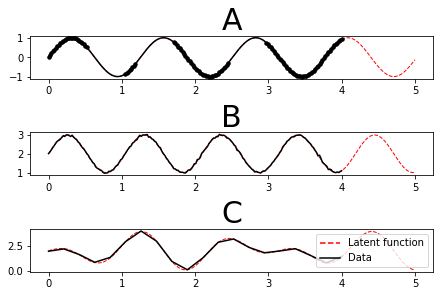

In [4]:
data = mogptk.DataSet()
data.append(mogptk.LoadFunction(lambda x: np.sin(5*x[:,0]), n=200, start=0.0, end=4.0, name='A'))
data.append(mogptk.LoadFunction(lambda x: np.sin(6*x[:,0])+2, n=200, start=0.0, end=4.0, var=0.03, name='B'))
data.append(mogptk.LoadFunction(lambda x: np.sin(6*x[:,0])+2 - np.sin(4*x[:,0]), n=20, start=0.0, end=4.0, var=0.03, name='C'))

data['A'].remove_random_ranges(3, 0.5)

data.set_pred_range(0.0, 5.0, n=200)

data.plot();

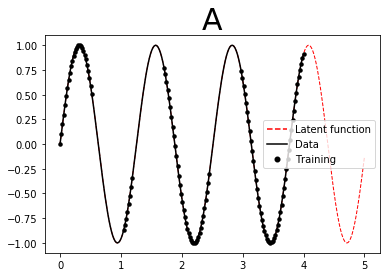

In [5]:
#data[0].transform(mogptk.TransformLog)
data[0].plot()

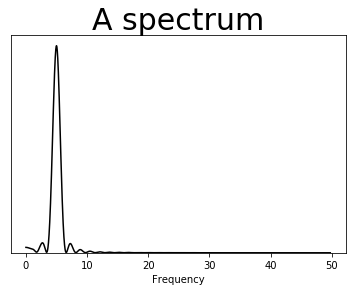

In [6]:
data[0].plot_spectrum()

## SM

In [ ]:
sm = mogptk.SM(data, Q=3)
display(sm.get_params())

In [ ]:
sm.estimate_params()
display(sm.get_params())
sm.plot_psd()

In [ ]:
sm.train(method='BFGS')
display(sm.get_params())
sm.plot_psd()

In [ ]:
sm.predict(plot=True)

## MOSM

In [7]:
mosm = mogptk.MOSM(data, Q=3)
mosm.print_params()

Instructions for updating:
Colocations handled automatically by placer.


Q=0,magnitude,mean,variance,delay,phase
A,1.093,[0.830],[0.982],[0.000],0.000
B,1.587,[0.020],[0.836],[0.000],0.000
C,-0.077,[-1.888],[0.297],[0.000],0.000
Q=1,magnitude,mean,variance,delay,phase
A,0.689,[0.193],[0.791],[0.000],0.000
B,1.066,[-0.732],[0.992],[0.000],0.000
C,0.836,[0.412],[0.889],[0.000],0.000
Q=2,magnitude,mean,variance,delay,phase
A,0.129,[-0.313],[0.069],[0.000],0.000
B,-1.550,[-0.182],[0.347],[0.000],0.000


Likelihood,variance
,1.0


In [8]:
mosm.estimate_params(method='SM')
mosm.print_params()

Instructions for updating:
Use tf.cast instead.
         Current function value: -730.346788
         Iterations: 46
         Function evaluations: 170
         Gradient evaluations: 160
Done in 0.0 minutes
         Current function value: -400.453325
         Iterations: 38
         Function evaluations: 114
         Gradient evaluations: 102
Done in 0.0 minutes
         Current function value: -4.802014
         Iterations: 178
         Function evaluations: 293
         Gradient evaluations: 282
Done in 0.0 minutes


Q=0,magnitude,mean,variance,delay,phase
A,0.000,[5.000],[2.000e-06],[0.000],0.000
B,2.998,[5.997],[2.025e-06],[0.000],0.000
C,0.002,[0.002],[0.001],[0.000],0.000
Q=1,magnitude,mean,variance,delay,phase
A,0.390,[5.000],[2.000e-06],[0.000],0.000
B,0.000,[6.283e-06],[6.564e-06],[0.000],0.000
C,2.610,[5.015],[0.150],[0.000],0.000
Q=2,magnitude,mean,variance,delay,phase
A,0.000,[5.000],[2.000e-06],[0.000],0.000
B,1.488,[6.283e-06],[2.000e-06],[0.000],0.000


Likelihood,variance
,1.0


In [9]:
mosm.train()
mosm.print_params()

Instructions for updating:
This op will be removed after the deprecation date. Please switch to tf.sets.difference().
Done in 0.4 minutes


Q=0,magnitude,mean,variance,delay,phase
A,0.000,[5.000],[2.000e-06],[0.000],0.000
B,6.649,[5.997],[6.880e-06],[0.000],0.000
C,0.168,[0.002],[0.001],[0.000],0.000
Q=1,magnitude,mean,variance,delay,phase
A,5.000,[5.000],[4.305e-06],[0.502],0.100
B,0.000,[6.283e-06],[6.564e-06],[-1.460e-15],-0.000
C,2.550,[3.187],[1.024],[-0.502],-0.100
Q=2,magnitude,mean,variance,delay,phase
A,0.000,[5.000],[2.000e-06],[-2.918e-37],-0.000
B,32.502,[6.275e-06],[9.529e-06],[-0.007],-0.283


Likelihood,variance
,1.0066342973117115e-06


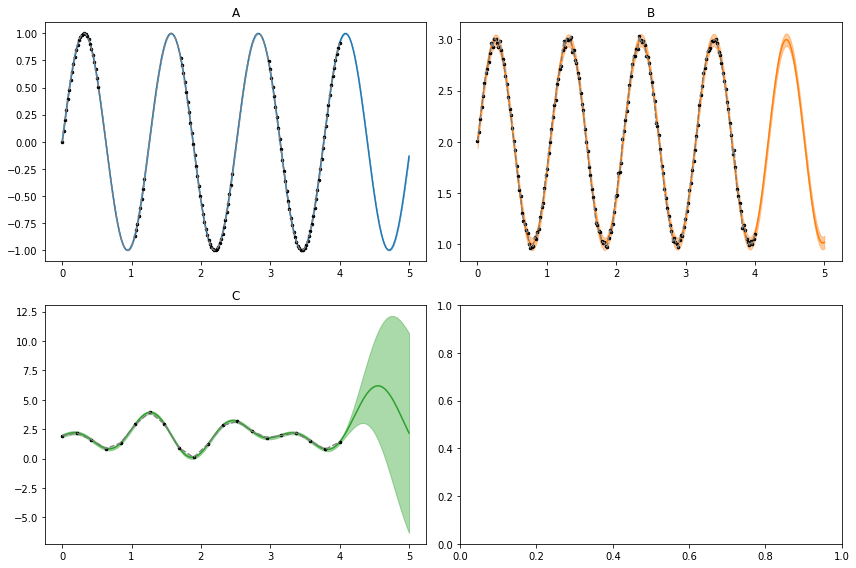

In [10]:
mosm.predict(plot=True)

### Plot

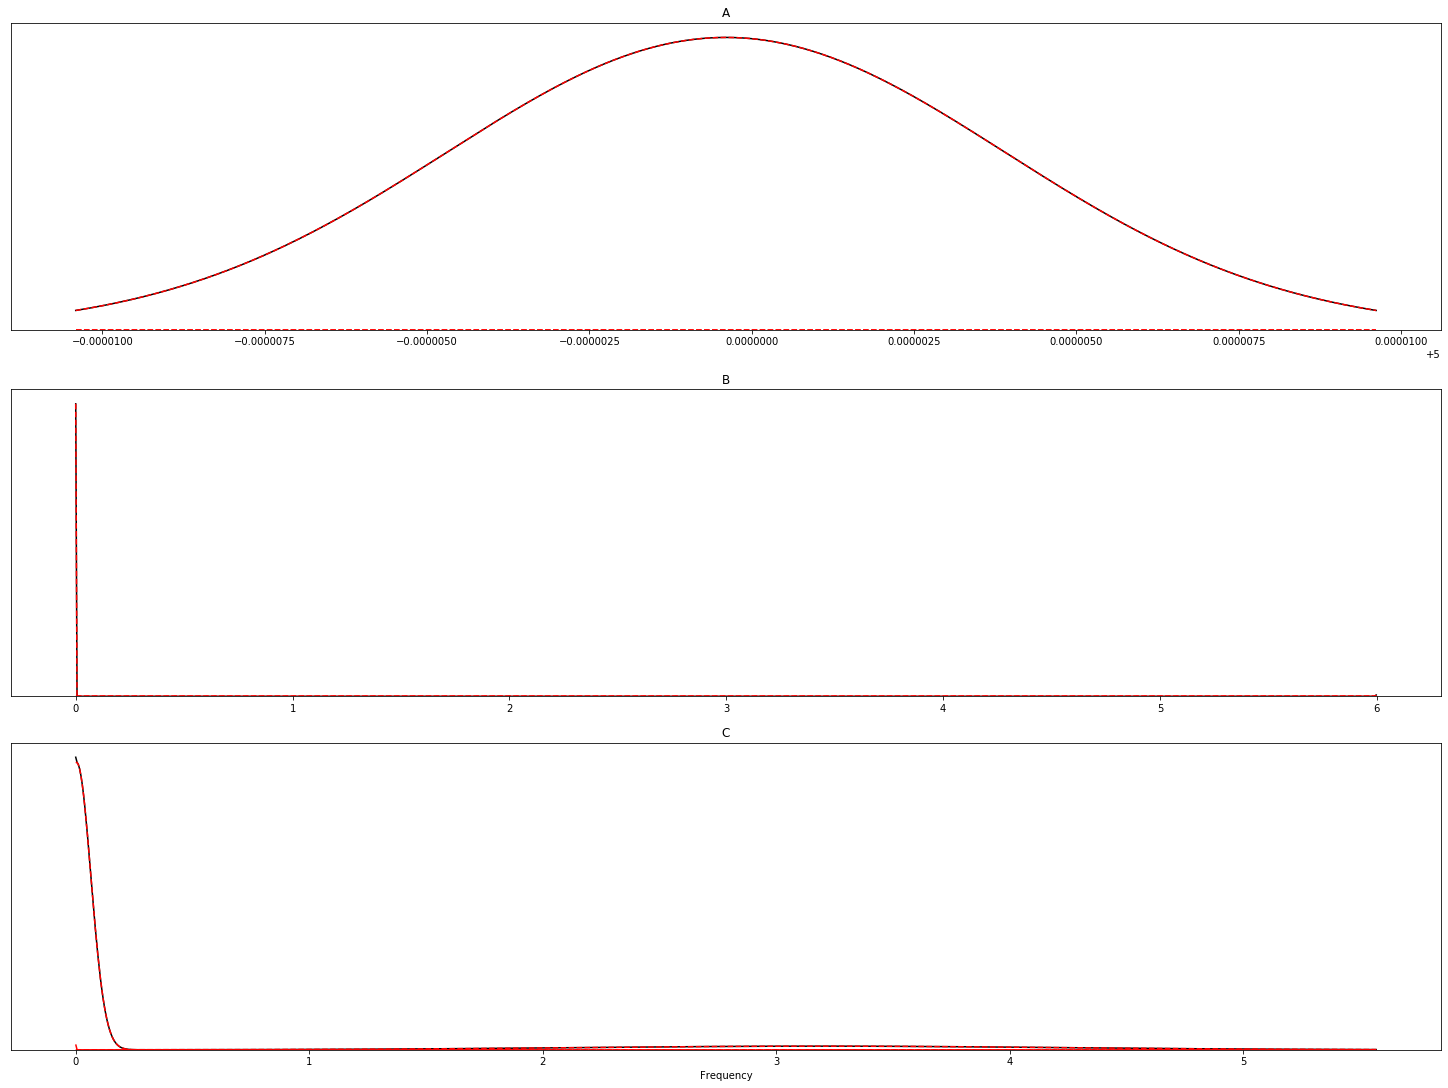

In [11]:
mosm.plot()

(<Figure size 1440x1008 with 9 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbe00b893c8>,
       dtype=object))

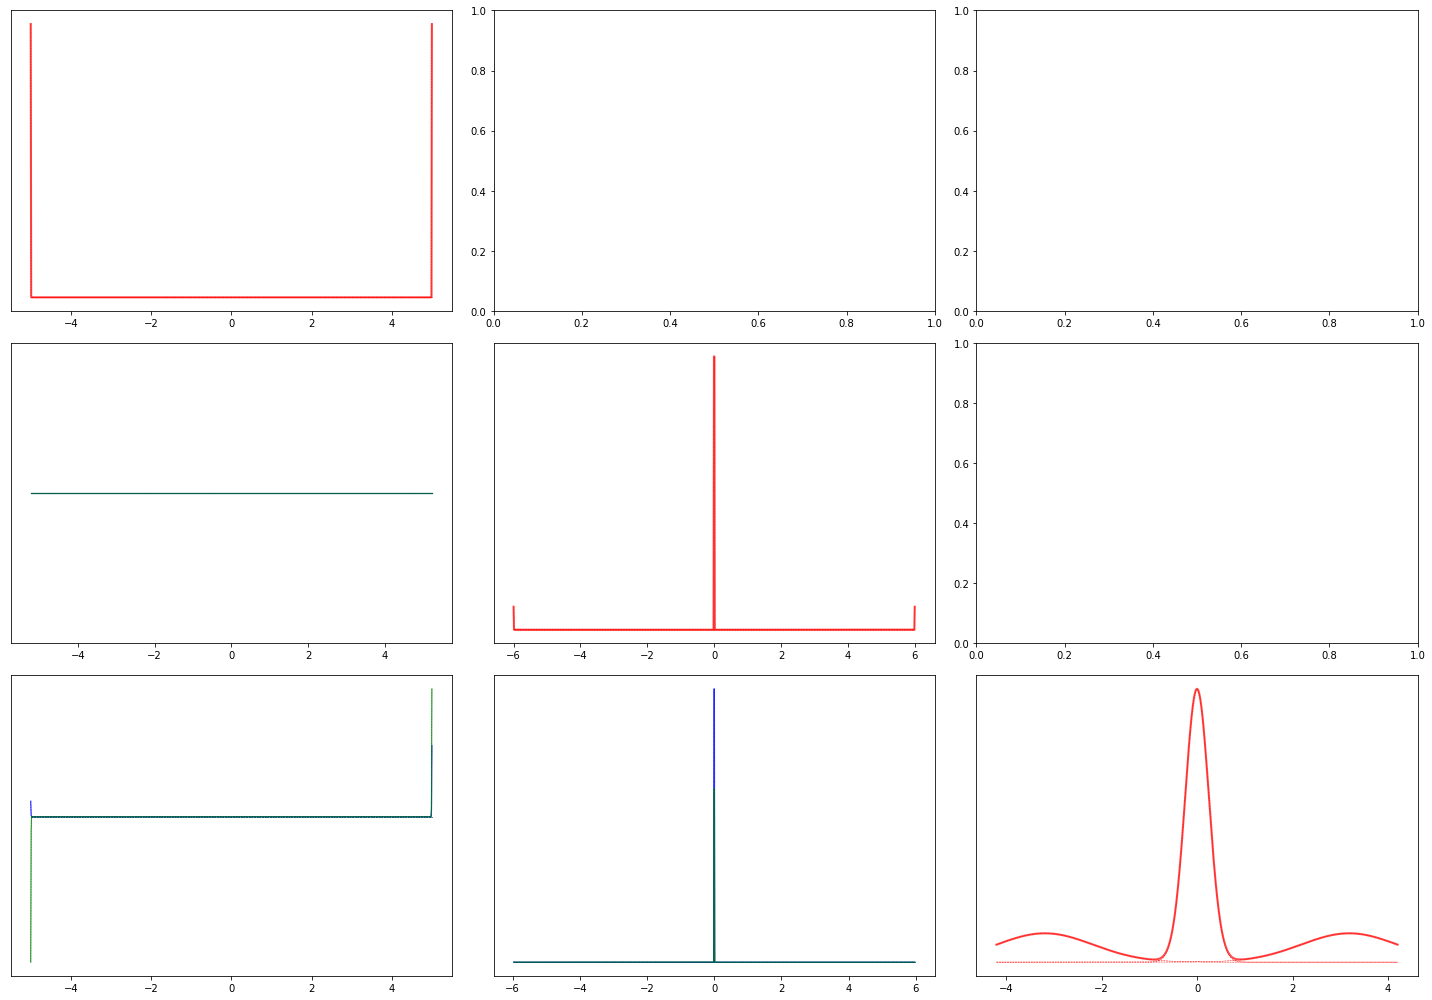

In [12]:
mosm.plot_psd()

(<Figure size 432x288 with 2 Axes>,
 array([[1.        , 0.        , 0.74893602],
        [0.        , 1.        , 5.07533833],
        [0.74893602, 5.07533833, 1.        ]]))

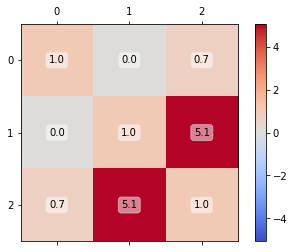

In [13]:
mosm.plot_correlations()

In [14]:
mosm.info()

‣ MOSM approaches RBF kernel for q=1 in channel='B'
‣ MOSM approaches RBF kernel for q=2 in channel='B'
‣ MOSM approaches RBF kernel for q=2 in channel='C'


### Saving and loading

In [15]:
mosm.save_params('mosm')
mosm.print_params()

Q=0,magnitude,mean,variance,delay,phase
A,0.000,[5.000],[2.000e-06],[0.000],0.000
B,6.649,[5.997],[6.880e-06],[0.000],0.000
C,0.168,[0.002],[0.001],[0.000],0.000
Q=1,magnitude,mean,variance,delay,phase
A,5.000,[5.000],[4.305e-06],[0.502],0.100
B,0.000,[6.283e-06],[6.564e-06],[-1.460e-15],-0.000
C,2.550,[3.187],[1.024],[-0.502],-0.100
Q=2,magnitude,mean,variance,delay,phase
A,0.000,[5.000],[2.000e-06],[-2.918e-37],-0.000
B,32.502,[6.275e-06],[9.529e-06],[-0.007],-0.283


Likelihood,variance
,1.0066342973117115e-06


In [16]:
mosm2 = mogptk.MOSM(data, Q=3)
mosm2.load_params('mosm')
mosm2.print_params()

Q=0,magnitude,mean,variance,delay,phase
A,0.000,[5.000],[2.000e-06],[0.000],0.000
B,6.649,[5.997],[6.880e-06],[0.000],0.000
C,0.168,[0.002],[0.001],[0.000],0.000
Q=1,magnitude,mean,variance,delay,phase
A,5.000,[5.000],[4.305e-06],[0.502],0.100
B,0.000,[6.283e-06],[6.564e-06],[-1.460e-15],-0.000
C,2.550,[3.187],[1.024],[-0.502],-0.100
Q=2,magnitude,mean,variance,delay,phase
A,0.000,[5.000],[2.000e-06],[-2.918e-37],-0.000
B,32.502,[6.275e-06],[9.529e-06],[-0.007],-0.283


Likelihood,variance
,1.0066342973117115e-06


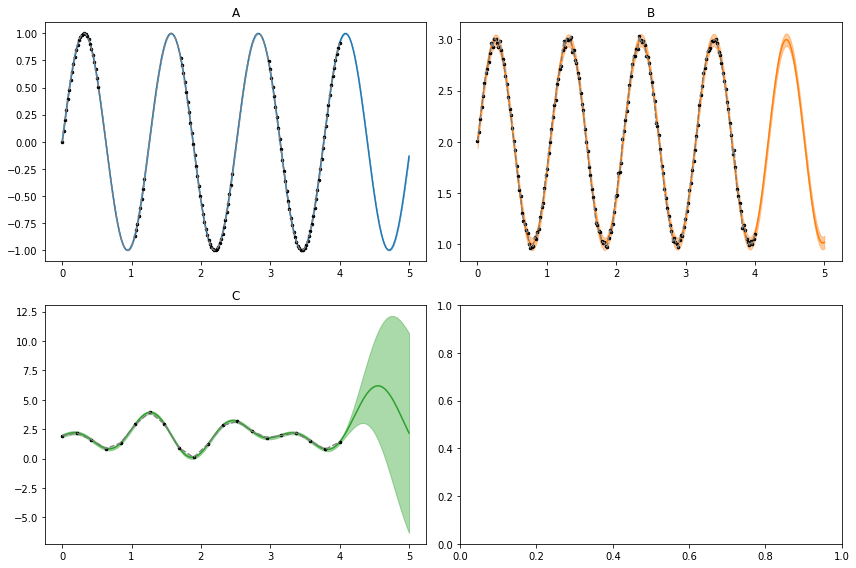

In [17]:
mosm2.predict(plot=True)

## SM-LMC

In [18]:
smlmc = mogptk.SM_LMC(data, Q=3, Rq=1)
smlmc.print_params()

Q=0,constant,mean,variance
A,[0.092],[0.719],[0.236]
B,[-0.169],[0.719],[0.236]
C,[-0.086],[0.719],[0.236]
Q=1,constant,mean,variance
A,[-1.030],[0.180],[0.013]
B,[-1.101],[0.180],[0.013]
C,[-0.009],[0.180],[0.013]
Q=2,constant,mean,variance
A,[1.254],[0.647],[0.087]
B,[0.953],[0.647],[0.087]


Likelihood,variance
,1.0


In [19]:
smlmc.estimate_params(method='BNSE')
smlmc.print_params()

Q=0,constant,mean,variance
A,[1.148],[4.028],[0.365]
B,[0.846],[4.028],[0.365]
C,[0.983],[4.028],[0.365]
Q=1,constant,mean,variance
A,[1.104],[4.474],[0.360]
B,[0.944],[4.474],[0.360]
C,[0.944],[4.474],[0.360]
Q=2,constant,mean,variance
A,[1.257],[2.251],[0.361]
B,[0.863],[2.251],[0.361]


Likelihood,variance
,1.0


In [20]:
smlmc.train()
smlmc.print_params()

Done in 0.2 minutes


Q=0,constant,mean,variance
A,[-7.617e-05],[0.004],[1.738]
B,[-5.375],[0.004],[1.738]
C,[1.974],[0.004],[1.738]
Q=1,constant,mean,variance
A,[-2.827],[5.000],[9.077e-06]
B,[3.084],[5.000],[9.077e-06]
C,[3.807],[5.000],[9.077e-06]
Q=2,constant,mean,variance
A,[7.387e-06],[0.048],[3.107]
B,[9.417],[0.048],[3.107]


Likelihood,variance
,1.0297571440834995e-06


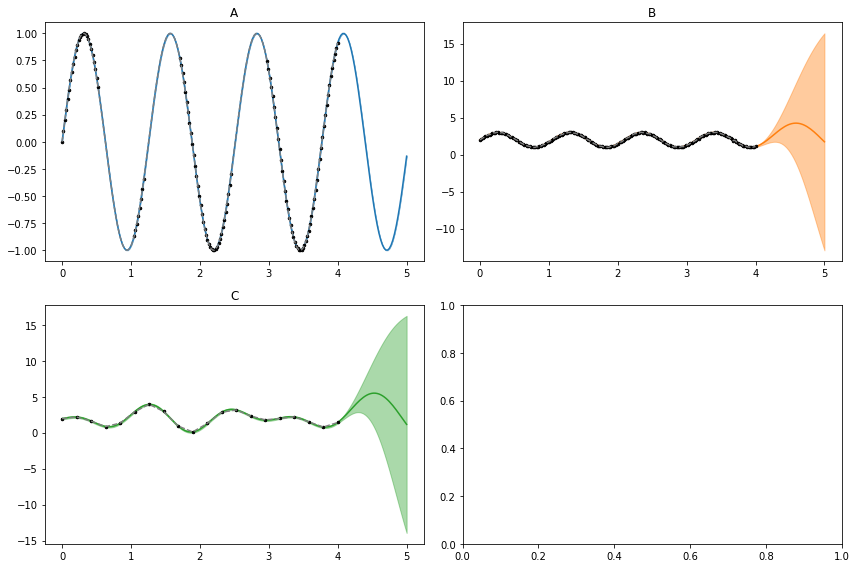

In [21]:
smlmc.predict(plot=True)

## CSM

In [22]:
csm = mogptk.CSM(data, Q=3, Rq=1)
csm.print_params()

Q=0,constant,mean,variance,phase
A,[0.960],[0.976],[0.140],[0.000]
B,[0.649],[0.976],[0.140],[0.000]
C,[0.301],[0.976],[0.140],[0.000]
Q=1,constant,mean,variance,phase
A,[0.070],[0.103],[0.514],[0.000]
B,[0.718],[0.103],[0.514],[0.000]
C,[0.016],[0.103],[0.514],[0.000]
Q=2,constant,mean,variance,phase
A,[0.998],[0.934],[0.214],[0.000]
B,[0.866],[0.934],[0.214],[0.000]


Likelihood,variance
,1.0


In [23]:
csm.estimate_params(method='BNSE')
csm.print_params()

Q=0,constant,mean,variance,phase
A,[1.000],[4.028],[0.912],[0.000]
B,[0.543],[4.028],[0.912],[0.000]
C,[0.732],[4.028],[0.912],[0.000]
Q=1,constant,mean,variance,phase
A,[1.000],[4.474],[0.900],[0.000]
B,[0.730],[4.474],[0.900],[0.000]
C,[0.730],[4.474],[0.900],[0.000]
Q=2,constant,mean,variance,phase
A,[1.000],[2.251],[0.902],[0.000]
B,[0.471],[2.251],[0.902],[0.000]


Likelihood,variance
,1.0


In [24]:
csm.train()
csm.print_params()

Done in 0.2 minutes


Q=0,constant,mean,variance,phase
A,[15.281],[5.000],[1.000e-06],[1.000e-06]
B,[1.004e-06],[5.000],[1.000e-06],[1.000e-06]
C,[0.193],[5.000],[1.000e-06],[1.000e-06]
Q=1,constant,mean,variance,phase
A,[1.000e-06],[0.002],[0.002],[1.000e-06]
B,[26.597],[0.002],[0.002],[1.000e-06]
C,[1.156],[0.002],[0.002],[1.000e-06]
Q=2,constant,mean,variance,phase
A,[1.000e-06],[1.391e-06],[3.321],[1.000e-06]
B,[40.071],[1.391e-06],[3.321],[1.000e-06]


Likelihood,variance
,1e-06


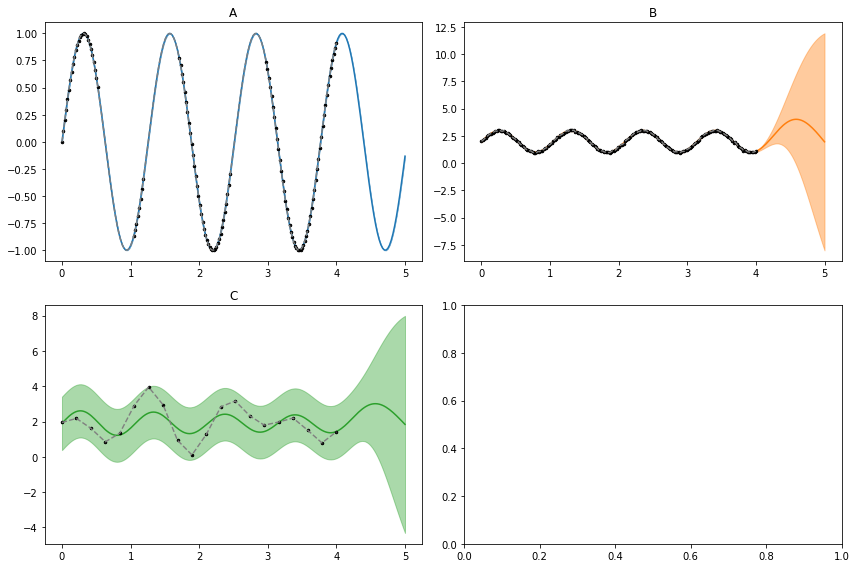

In [25]:
csm.predict(plot=True)

## CONV

In [26]:
conv = mogptk.CONV(data, Q=3)
conv.print_params()

Q=0,constant,variance
A,0.471,[0.000]
B,0.774,[0.000]
C,0.087,[0.000]
Q=1,constant,variance
A,0.113,[0.000]
B,0.066,[0.000]
C,0.259,[0.000]
Q=2,constant,variance
A,0.941,[0.000]
B,0.161,[0.000]


Likelihood,variance
,1.0


In [27]:
conv.estimate_params(method='SM')
conv.print_params()

         Current function value: -574.015264
         Iterations: 31
         Function evaluations: 85
         Gradient evaluations: 74
Done in 0.0 minutes
         Current function value: 218.278999
         Iterations: 97
         Function evaluations: 213
         Gradient evaluations: 202
Done in 0.0 minutes
         Current function value: 43.331127
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 10
Done in 0.0 minutes


Q=0,constant,variance
A,2.072,[0.263]
B,0.809,[0.006]
C,0.119,[77.807]
Q=1,constant,variance
A,0.000,[62.647]
B,0.022,[82.529]
C,2.978,[1199.815]
Q=2,constant,variance
A,0.000,[1730.246]
B,0.022,[85.464]


Likelihood,variance
,1.0


In [29]:
conv.train(method='Adam')
conv.print_params()

InvalidArgumentError: Cholesky decomposition was not successful. The input might not be valid.
	 [[node GPR-c1dca130-180/likelihood_1/Cholesky (defined at /home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/gpflow/models/gpr.py:72) ]]

Caused by op 'GPR-c1dca130-180/likelihood_1/Cholesky', defined at:
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/asyncio/base_events.py", line 438, in run_forever
    self._run_once()
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/asyncio/base_events.py", line 1451, in _run_once
    handle._run()
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/tornado/gen.py", line 787, in inner
    self.run()
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/tornado/gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 378, in dispatch_queue
    yield self.process_one()
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/tornado/gen.py", line 225, in wrapper
    runner = Runner(result, future, yielded)
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/tornado/gen.py", line 714, in __init__
    self.run()
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/tornado/gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 272, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 542, in execute_request
    user_expressions, allow_stdin,
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2855, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2881, in _run_cell
    return runner(coro)
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3058, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3249, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-26-cb6a50ddc6e2>", line 1, in <module>
    conv = mogptk.CONV(data, Q=3)
  File "../mogptk/conv.py", line 52, in __init__
    self._build(kernel_set, likelihood, variational, sparse, like_params)
  File "../mogptk/model.py", line 61, in _build
    self.model = gpflow.models.GPR(x, y, kernel)
  File "</home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/decorator.py:decorator-gen-177>", line 2, in __init__
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/gpflow/core/compilable.py", line 156, in init_wrapper
    self.build()
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/gpflow/core/node.py", line 156, in build
    self._build()
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/gpflow/models/model.py", line 80, in _build
    likelihood = self._build_likelihood()
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/gpflow/decors.py", line 49, in name_scope_wrapper
    return method(*args, **kwargs)
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/gpflow/decors.py", line 67, in tensor_mode_wrapper
    result = method(obj, *args, **kwargs)
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/gpflow/models/gpr.py", line 72, in _build_likelihood
    L = tf.cholesky(K)
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/tensorflow/python/ops/gen_linalg_ops.py", line 767, in cholesky
    "Cholesky", input=input, name=name)
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3300, in create_op
    op_def=op_def)
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1801, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): Cholesky decomposition was not successful. The input might not be valid.
	 [[node GPR-c1dca130-180/likelihood_1/Cholesky (defined at /home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/gpflow/models/gpr.py:72) ]]


In [ ]:
conv.predict(plot=True)

## Errors